**Keywords**: *Prognostic Health Management*

In [1]:
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)

Modern systems are currently monitored by multiple sensors that generates large volumes of data. For instance, for a Boeing 787, approximately 1000 parameters are continously monitored for the engine, leading to a total of 20 TB of data per flight hour.

*Badea VE, Zamfiroiu A, Boncea R. "Bigdata in the aerospace industry". Inform Econ 2018; 22(1):17–24.*

Important components in a turbofan engine as far as C-MAPSS data concerns are **Fan**, **Low Pressure Compressor (LPC)**, **High Pressure Compressor (HPC)**, **Low Pressure Turbine (LPT)**, and **High Pressure Turbine**. During the operation of engines, degradation occurs in each of the components. If degredation level in any component exceeds a threshold, the engine is said to have failed.

- Jet engines are inspected before every take off, and this is a form of periodic maintenance that is not cost effective. Since the crucial nature of the operation, the strategy is justified to forsee possiblity of an engine to fail mid-air.
- Also a system that is capable of issuing early warnings may help responsibles to prepare for the problem, if not prevent altogether. 

This dataset was generated with C-MAPSS ('Commercial Modular Aero-Propulsion System Simulation') simulator. C-MAPSS is a tool for the simulation of realistic large commercial turbofan engine data. The time series data were collected from 21 sensors for each engine in the dataset.

- Dataset contains data from same type of engine.
- Engines were healthy in the early stages of operations and tended to degrade over time until a failure occurred.
- Data was contaminated with sensor noise

**Goal**: Predict the number of remaining operational cycles before a system failure occurs in the test set. 

In [3]:
index_names = [
    'engine', 
    'cycle'
]

setting_names = [
    'setting_1', 
    'setting_2', 
    'setting_3'
]

sensor_names = [ 
    "(Fan inlet temperature) (◦R)",
    "(LPC outlet temperature) (◦R)",
    "(HPC outlet temperature) (◦R)",
    "(LPT outlet temperature) (◦R)",
    "(Fan inlet Pressure) (psia)",
    "(bypass-duct pressure) (psia)",
    "(HPC outlet pressure) (psia)",
    "(Physical fan speed) (rpm)",
    "(Physical core speed) (rpm)",
    "(Engine pressure ratio(P50/P2)",
    "(HPC outlet Static pressure) (psia)",
    "(Ratio of fuel flow to Ps30) (pps/psia)",
    "(Corrected fan speed) (rpm)",
    "(Corrected core speed) (rpm)",
    "(Bypass Ratio) ",
    "(Burner fuel-air ratio)",
    "(Bleed Enthalpy)",
    "(Required fan speed)",
    "(Required fan conversion speed)",
    "(High-pressure turbines Cool air flow)",
    "(Low-pressure turbines Cool air flow)"
]

col_names = index_names + setting_names + sensor_names

In [4]:
df_train = pd.read_csv('CMAPSSData/train_FD001.txt', sep='\s+', header=None, names=col_names)
df_test = pd.read_csv(('CMAPSSData/test_FD001.txt'), sep='\s+', header=None, names=col_names)
df_test_RUL = pd.read_csv(('CMAPSSData/RUL_FD001.txt'), sep='\s+', header=None, names=['RUL'])
df_train.head()

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(Engine pressure ratio(P50/P2),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [5]:
df_train.shape

(20631, 26)

**Column 1** corresponds to engine number.

In [6]:
print(f"There are a total of {len(np.unique(df_train['engine']))} engines.")

There are a total of 100 engines.


In [7]:
# Check if there is any missing values in the training set

print(f"There are {df_train.isna().sum().sum()} missing values")

There are 0 missing values


In [8]:
df_test.head()

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(Engine pressure ratio(P50/P2),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


#### After how many cycles does each engine fail? 

In [9]:
print(df_train.groupby('engine').size().to_list())

[192, 287, 179, 189, 269, 188, 259, 150, 201, 222, 240, 170, 163, 180, 207, 209, 276, 195, 158, 234, 195, 202, 168, 147, 230, 199, 156, 165, 163, 194, 234, 191, 200, 195, 181, 158, 170, 194, 128, 188, 216, 196, 207, 192, 158, 256, 214, 231, 215, 198, 213, 213, 195, 257, 193, 275, 137, 147, 231, 172, 185, 180, 174, 283, 153, 202, 313, 199, 362, 137, 208, 213, 213, 166, 229, 210, 154, 231, 199, 185, 240, 214, 293, 267, 188, 278, 178, 213, 217, 154, 135, 341, 155, 258, 283, 336, 202, 156, 185, 200]


We can see that engine 1 failed after 192 cycles, and engine 2 failed after 287 cycles.

> At the first cycle of *Engine 1*, its **RUL** is 191. After cycle 2, its **RUL** is 190 and so on. As it fails after 192 cycles, at 192nd cycle, its **RUL** is 0. This type of degredation model is called linear degredation model. From the start of the cycle it decreases gradually to 0 at the last cycle.

#### Drop constant features - No effect on target regression

In [10]:
const_features = []

for feature in list(setting_names + sensor_names):
    if df_train[feature].min() == df_train[feature].max():
        const_features.append(feature)

print(f"Constant features: {const_features}")

Constant features: ['setting_3', '(Fan inlet temperature) (◦R)', '(Fan inlet Pressure) (psia)', '(Engine pressure ratio(P50/P2)', '(Burner fuel-air ratio)', '(Required fan speed)', '(Required fan conversion speed)']


In [11]:
df_train.drop(const_features, axis=1, inplace=True)
df_test.drop(const_features, axis=1, inplace=True)

#### Explore the correlations between features

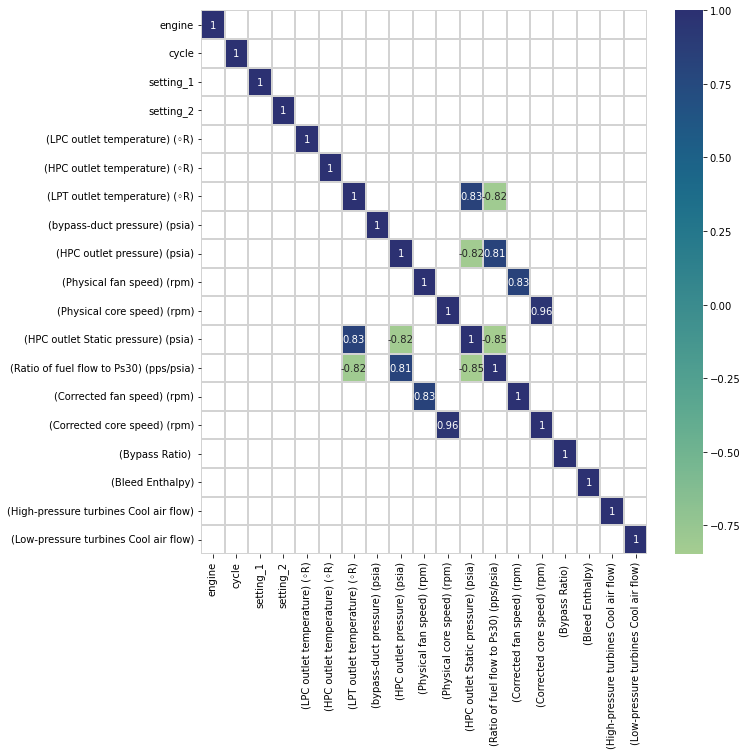

In [12]:
plt.figure(figsize=(10,10))

threshold = 0.80

corr = df_train.corr()
mask = corr.where((abs(corr) >= threshold)).isna()

plot_kws={"s": 1}
sns.heatmap(corr, annot=True, cmap="crest",
            linewidths=0.05, 
            linecolor='lightgray',
            mask=mask).set_facecolor('white')

In [13]:
# Dropping one of the highly correlated features

corr = df_train.corr().abs()

# Select only the upper triangle of the correlation matrix
upper_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool_))

# Get the index of feature columns having correlation greater than 0.95
corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(corr_features)

['(Corrected core speed) (rpm)']


In [14]:
df_train.drop(corr_features, axis=1, inplace=True)
df_test.drop(corr_features, axis=1, inplace=True)

In [15]:
print(f"Remaining features are: {list(df_train)}")

Remaining features are: ['engine', 'cycle', 'setting_1', 'setting_2', '(LPC outlet temperature) (◦R)', '(HPC outlet temperature) (◦R)', '(LPT outlet temperature) (◦R)', '(bypass-duct pressure) (psia)', '(HPC outlet pressure) (psia)', '(Physical fan speed) (rpm)', '(Physical core speed) (rpm)', '(HPC outlet Static pressure) (psia)', '(Ratio of fuel flow to Ps30) (pps/psia)', '(Corrected fan speed) (rpm)', '(Bypass Ratio) ', '(Bleed Enthalpy)', '(High-pressure turbines Cool air flow)', '(Low-pressure turbines Cool air flow)']


#### Distribution of maximum time cycles

In [16]:
max_cycles = df_train[index_names].groupby('engine').max()

In [17]:
max_cycles.iloc[0]

cycle    192
Name: 1, dtype: int64

In [18]:
max_cycles.rename(columns={'cycle':'max_cycle'}, inplace=True)
max_cycles.head()

,max_cycle
engine,
1,192
2,287
3,179
4,189
5,269


Text(0.5, 6.799999999999994, 'max cycle')

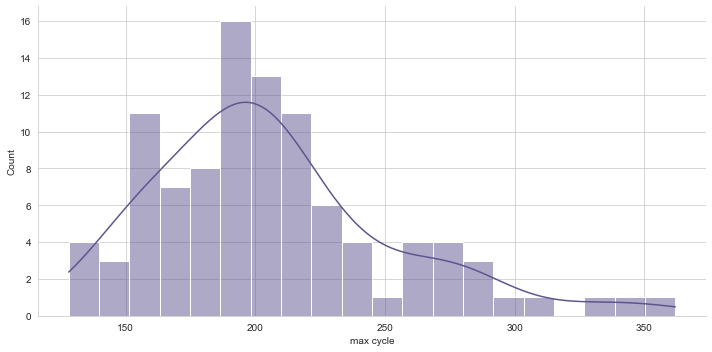

In [19]:
sns.set_style("whitegrid")

sns.displot(max_cycles['max_cycle'], kde=True, bins=20, height=5, aspect=2, color='#5e548e')
plt.xlabel('max cycle')

From the training data, we can infer that maximum operational cycles that an engine can achieve is between 190 and 210 before a HPC failure occurs.

In [20]:
df_train = df_train.merge(max_cycles, how="left", on=['engine'])
df_train.head()

,engine,cycle,setting_1,setting_2,(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),max_cycle
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,192
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,192
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,192
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,192


In [21]:
df_train['RUL'] = df_train['max_cycle'] - df_train['cycle']
df_train.drop(['max_cycle'], axis=1, inplace=True)
df_train.head()

,engine,cycle,setting_1,setting_2,(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187


In [ ]:
df_train['RUL'][df_train['RUL'] > 125] = 125

## Feature Selection

In [23]:
# Code adopted from https://www.kaggle.com/code/adibouayjan/house-price-step-by-step-modeling

Selected_Features = []
import statsmodels.api as sm

def backward_regression(X, y, initial_list=[], threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression 

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling 
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")
    
# Application of the backward regression function on our training data
X = df_train.iloc[:,1:-1]
y = df_train.iloc[:,-1]
backward_regression(X, y)

worst_feature : setting_1, 0.3590854598706933 
worst_feature : setting_2, 0.18806323578923845 

Selected Features:
['cycle', '(LPC outlet temperature) (◦R)', '(HPC outlet temperature) (◦R)', '(LPT outlet temperature) (◦R)', '(bypass-duct pressure) (psia)', '(HPC outlet pressure) (psia)', '(Physical fan speed) (rpm)', '(Physical core speed) (rpm)', '(HPC outlet Static pressure) (psia)', '(Ratio of fuel flow to Ps30) (pps/psia)', '(Corrected fan speed) (rpm)', '(Bypass Ratio) ', '(Bleed Enthalpy)', '(High-pressure turbines Cool air flow)', '(Low-pressure turbines Cool air flow)']


In [24]:
len(Selected_Features[0])

15

### Apply feature transformations to test set

In [25]:
df_test_cycle = df_test.groupby(['engine']).agg({'cycle':'max'})
df_test_cycle.rename(columns={'cycle':'life'},inplace=True)
df_test_max = df_test.merge(df_test_cycle,how='left',on=['engine'])
df_test_max = df_test_max[(df_test_max['cycle']==df_test_max['life'])]
df_test_max.drop(['life'],axis=1,inplace=True)

#### Create final train and test sets

In [26]:
X_train = df_train[Selected_Features[0]]
y_train = df_train.iloc[:,-1]
X_test = df_test_max[Selected_Features[0]]
y_test = df_test_RUL.iloc[:,-1]

In [ ]:
df_train.head()

In [28]:
X_train.to_csv('cmapss_train_data.csv', index=False)
y_train.to_csv('cmapss_train_labels.csv', index=False)

X_test.to_csv('cmapss_test_data.csv', index=False)
y_test.to_csv('cmapss_test_labels.csv', index=False)

In [31]:
X_train.shape, X_test.shape

((20631, 15), (100, 15))

In [32]:
X_test.head()

,cycle,(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
30,31,642.58,1581.22,1398.91,21.61,554.42,2388.08,9056.40,47.23,521.79,2388.06,8.4024,393,38.81,23.3552
79,49,642.55,1586.59,1410.83,21.61,553.52,2388.10,9044.77,47.67,521.74,2388.09,8.4505,391,38.81,23.2618
205,126,642.88,1589.75,1418.89,21.61,552.59,2388.16,9049.26,47.88,520.83,2388.14,8.4119,395,38.93,23.2740
311,106,642.78,1594.53,1406.88,21.61,552.64,2388.13,9051.30,47.65,521.88,2388.11,8.4634,395,38.58,23.2581
409,98,642.27,1589.94,1419.36,21.61,553.29,2388.10,9053.99,47.46,521.00,2388.15,8.4362,394,38.75,23.4117


In [36]:
y_test

0     112
1      98
2      69
3      82
4      91
5      93
6      91
7      95
8     111
9      96
10     97
11    124
12     95
13    107
14     83
15     84
16     50
17     28
18     87
19     16
20     57
21    111
22    113
23     20
24    145
25    119
26     66
27     97
28     90
29    115
30      8
31     48
32    106
33      7
34     11
35     19
36     21
37     50
38    142
39     28
40     18
41     10
42     59
43    109
44    114
45     47
46    135
47     92
48     21
49     79
50    114
51     29
52     26
53     97
54    137
55     15
56    103
57     37
58    114
59    100
60     21
61     54
62     72
63     28
64    128
65     14
66     77
67      8
68    121
69     94
70    118
71     50
72    131
73    126
74    113
75     10
76     34
77    107
78     63
79     90
80      8
81      9
82    137
83     58
84    118
85     89
86    116
87    115
88    136
89     28
90     38
91     20
92     85
93     55
94    128
95    137
96     82
97     59
98    117
99     20


In [29]:
df_train.to_csv('cmapss_train_df.csv', index=False)
df_test.to_csv('cmapss_test_df.csv', index=False)